<a href="https://colab.research.google.com/github/ag-wnl/pypy/blob/main/tensorflow_tut_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Statements

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt

Making a model to train on and predict the mnist dataset.

In [32]:
tensor_a = tf.constant([1,2,3])
print(tensor_a)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [33]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [34]:
x_train, x_test  = x_train/255.0, x_test/255.0

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(units=10)
])
#Sequential is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables.

In [36]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.11420281, -0.14928052, -0.13468404, -0.15477353,  0.92216766,
        -0.41510782,  0.2693998 , -0.06235594, -0.20582648,  0.6725927 ]],
      dtype=float32)

In [37]:
softt = tf.nn.softmax(predictions).numpy()  #softmax outputs probabilities

In [38]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
loss_function(y_train[:1], predictions).numpy()

2.89248

We compile Model before training

In [39]:
model.compile(
    optimizer = 'adam',
    loss = loss_function,
    metrics = ['accuracy']
)

Training Model:

In [51]:
history = model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0650 - accuracy: 0.9787
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0580 - accuracy: 0.9810
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0516 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0475 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0438 - accuracy: 0.9859


Evaluating Model

In [52]:
model.evaluate(x_test, y_test, verbose = 1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9780


[0.07737351208925247, 0.9779999852180481]

Now making the model output probabilities by adding a softmax final layer

In [53]:
probab_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [54]:
probab_model(x_test[:5]).numpy()

array([[3.31837530e-10, 3.87919454e-11, 5.97068492e-08, 2.02865758e-05,
        8.60023852e-17, 1.10669077e-07, 6.23691469e-17, 9.99973655e-01,
        2.03521511e-09, 5.84157033e-06],
       [1.70400227e-08, 8.59272063e-07, 9.99980927e-01, 1.81276409e-05,
        1.49834850e-19, 7.45893694e-11, 1.91031493e-08, 4.82640707e-19,
        1.01097775e-07, 5.61795322e-15],
       [1.53777147e-09, 9.99896049e-01, 1.76220328e-05, 1.23695179e-06,
        4.25726427e-07, 2.48849858e-07, 2.15352557e-07, 4.08633096e-05,
        4.33185196e-05, 1.69036927e-08],
       [9.99815762e-01, 6.19505792e-12, 1.35719110e-05, 2.60126036e-08,
        5.56465707e-11, 1.72791523e-08, 7.77019704e-06, 2.46018544e-06,
        1.11681384e-08, 1.60451396e-04],
       [5.48747892e-08, 3.12673776e-11, 1.26089958e-07, 1.81039572e-09,
        9.72574294e-01, 4.37101477e-07, 3.97656891e-07, 3.95453071e-06,
        4.04410321e-06, 2.74166185e-02]], dtype=float32)

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Plotting and visualizing things

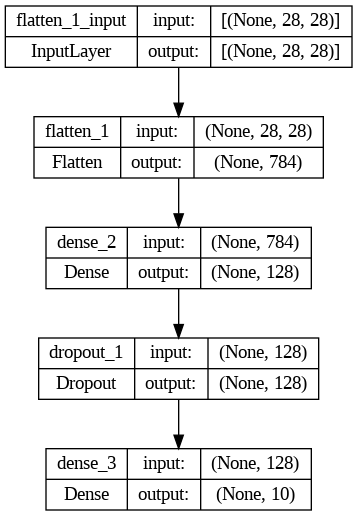

In [56]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [63]:
#shows that history is a dictionary which stores model training data
history.history??

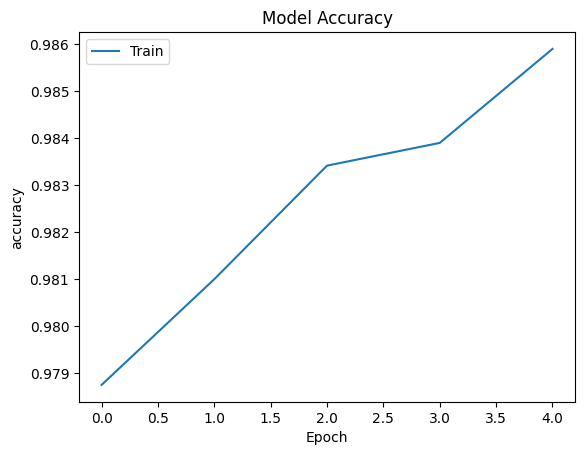

In [59]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'upper left')
plt.show()

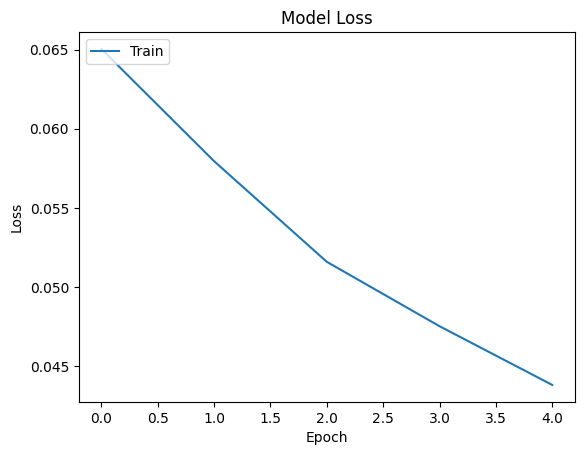

In [67]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'upper left')
plt.show()